In [16]:
import pandas as pd

column_names = ['id', 'entity', 'sentiment', 'content']
train_data_path = '/content/twitter_training.csv'
val_data_path = '/content/twitter_validation.csv'

train_df = pd.read_csv(train_data_path, names=column_names)
val_df = pd.read_csv(val_data_path, names=column_names)

train_df.dropna(subset=['content'], inplace=True)
val_df.dropna(subset=['content'], inplace=True)

print(train_df.head())
print(val_df.head())


     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
     id     entity   sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                             content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

train_df['cleaned_text'] = train_df['content'].astype(str).apply(preprocess_text)
val_df['cleaned_text'] = val_df['content'].astype(str).apply(preprocess_text)

print(train_df[['content', 'cleaned_text']].head())
print(val_df[['content', 'cleaned_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                      cleaned_text  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  
                                             content  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for WORD when it funct...   
3  CSGO matchmaking is so full of closet hacking,...   
4  Now the President is slapping Americans in the...   

                                        cleaned_text  
0  mentioned facebook struggling motivation go ru

In [23]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

train_df['sentiment_label'] = train_df['sentiment_score'].apply(classify_sentiment)
val_df['sentiment_label'] = val_df['sentiment_score'].apply(classify_sentiment)

# Count the number of tweets in each sentiment category
train_sentiment_counts = train_df['sentiment_label'].value_counts()
val_sentiment_counts = val_df['sentiment_label'].value_counts()

# Display the sentiment counts
print(train_sentiment_counts)
print(val_sentiment_counts)


sentiment_label
Positive    34352
Negative    27189
Neutral     13141
Name: count, dtype: int64
sentiment_label
Positive    494
Negative    400
Neutral     106
Name: count, dtype: int64


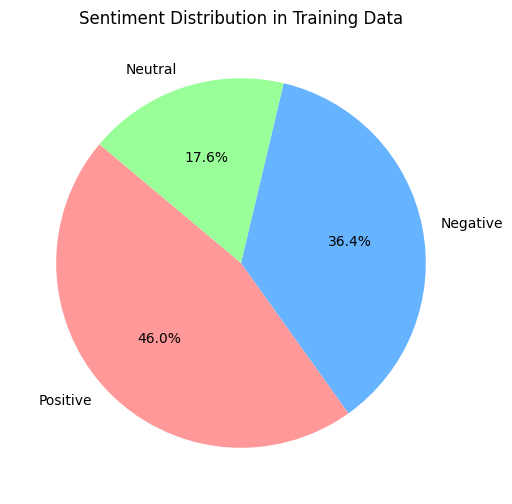

In [27]:
plt.figure(figsize=(6, 6))
train_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution in Training Data')
plt.ylabel('')  # Remove the y-label
plt.show()


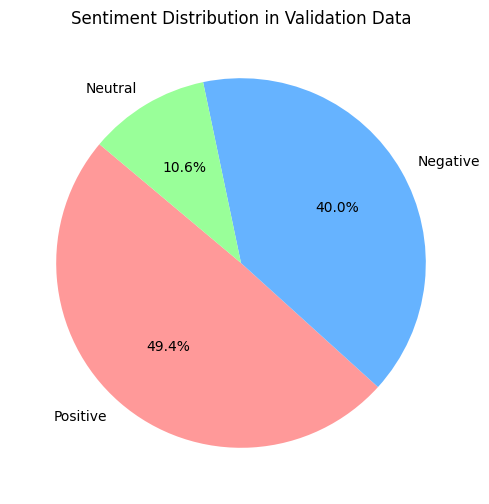

In [28]:
# Create a pie chart for validation data sentiment distribution
plt.figure(figsize=(6, 6))
val_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution in Validation Data')
plt.ylabel('')  # Remove the y-label
plt.show()

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

train_df['sentiment_score'] = train_df['cleaned_text'].apply(get_sentiment_score)
val_df['sentiment_score'] = val_df['cleaned_text'].apply(get_sentiment_score)

print(train_df[['cleaned_text', 'sentiment_score']].head())
print(val_df[['cleaned_text', 'sentiment_score']].head())


                      cleaned_text  sentiment_score
0    im getting borderlands murder          -0.6908
1              coming borders kill          -0.6908
2      im getting borderlands kill          -0.6908
3     im coming borderlands murder          -0.6908
4  im getting borderlands 2 murder          -0.6908
                                        cleaned_text  sentiment_score
0  mentioned facebook struggling motivation go ru...          -0.2263
1  bbc news amazon boss jeff bezos rejects claims...          -0.0000
2  microsoft pay word functions poorly samsungus ...          -0.1027
3  csgo matchmaking full closet hacking truly awf...          -0.0258
4  president slapping americans face really commi...           0.3597


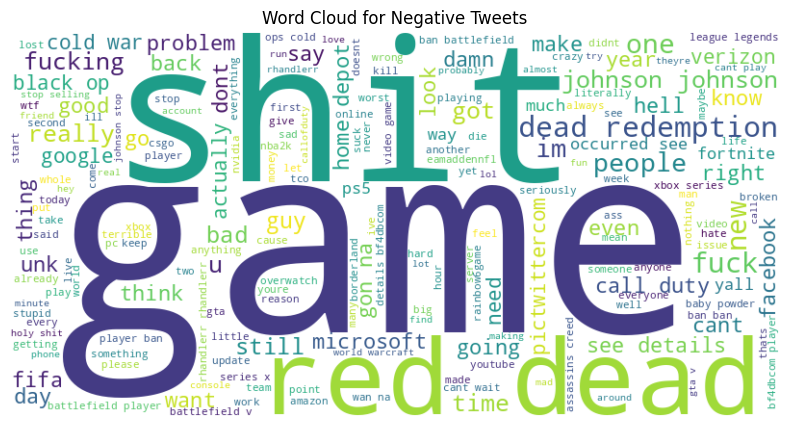

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_tweets = train_df[train_df['sentiment_score'] < 0]

negative_text = ' '.join(negative_tweets['cleaned_text'])

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

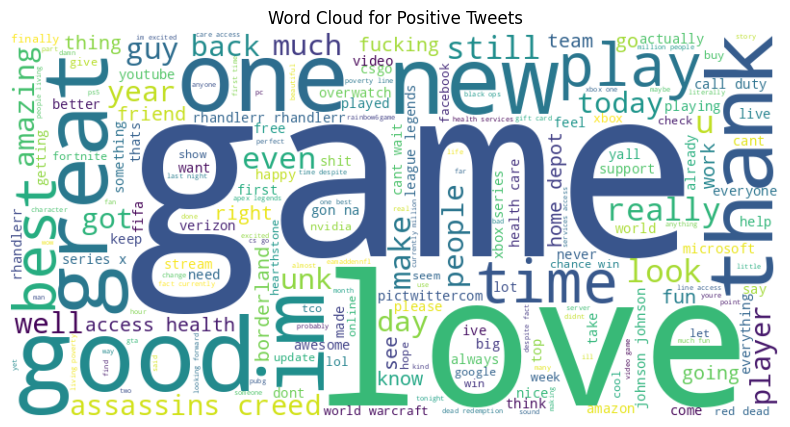

In [22]:
# Filter positive tweets
positive_tweets = train_df[train_df['sentiment_score'] > 0]
positive_text = ' '.join(positive_tweets['cleaned_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()